# Employee Retention Analysis

The following analysis explores simulated data from data.world which peers into employee retention rates for a company. 

First, let's import the neccessary packages for data manipulation and visual representation in python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

Now let's import our dataset and check to see if there are any missing values.

In [4]:
employee = pd.DataFrame.from_csv('HR_comma_sep.csv', index_col=None)

employee.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

There doesn't seem to be any missing values. Now let's see what we are actually dealing with:

In [5]:
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Alright, it looks good but there's something about the column titles that could be fixed for readability. 

In [6]:
employee = employee.rename(columns={'satisfaction_level': 'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

employee.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


That's better. However, it seems that the column we really care about, turnover, is sandwiched in the middle. LEt's move it on over to the left just for clarity.

In [7]:
front = employee['turnover']
employee.drop(labels=['turnover'], axis=1,inplace = True)
employee.insert(0, 'turnover', front)
employee.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


That's much better! Alright, now what's the shape of this dataframe? 

In [8]:
employee.shape

(14999, 10)

The dataframe contains 10 columns and 14,999 rows. Great! Now what are some of the features of this dataset?

In [9]:
employee.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

We have mostly integers, with a few floating points and two string objects. One of the key things I want to get out of the way is, what's the employee turnover rate for this company?

In [10]:
turnover = employee.turnover.value_counts() / 14999
turnover

0    0.761917
1    0.238083
Name: turnover, dtype: float64

Noting that a score of 1 means an employee has left, it seems that about 24% of employees have left the company and about 76% have stayed. Let's get a statistical overview of the employees.

In [11]:
employee.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


It seems that employees, on average, are moderately satisfied with their job (around 0.60 on the statisfaction score), are deemed fairly good workers by their employer, work on about 4 projects, work about 200 hours a month (50 per week), and have spent around 4 years with the company. Interestingly, around 14% have had a work accident, and only about 2% of the employees have recieved a promotion. Great, but why do employees leave? Is there a difference in the employees who leave (turnover group) vs those who stay? (non-turnover group)? Let's see: 

In [12]:
turnoversummary = employee.groupby('turnover')
turnoversummary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Now there seems to be a clearer picture. The few variables that stand out are satisfaction, average hours worked a month, and promotion. It seems that employees who decided to leave reported a satisfaction score, on average, of 0.44 compared to 0.66 of those who stayed. Employees who left also worked, on average, 8 more hours a month and were promoted at a rate of .5% compared to 2% for those who stayed. Before we make any conclusions, let's explore the data a little further. 

First, let's see if there is a strong correlation between turnover and the following variables: satisfaction, average hours worked monthly, and promotion. Let's run a correlation matrix:

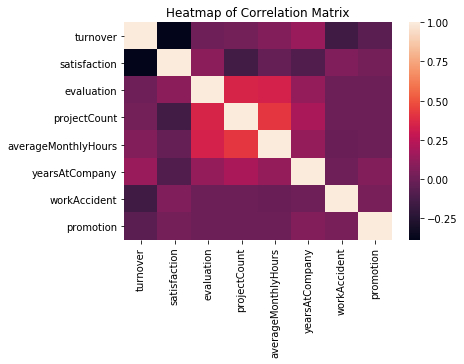

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


In [13]:
corr = employee.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show()
corr

If we investigate which variables correlate with turnover rates, we see that satisfaction correlated negatively with turnover (-0.39). There were weak correlations between turnover and promotion and average monthly hours. 

Let's see if graphing reveals any interesting trends. Let's graph employee satifaction, employee evaluation, and employee average monthly hours worked. 

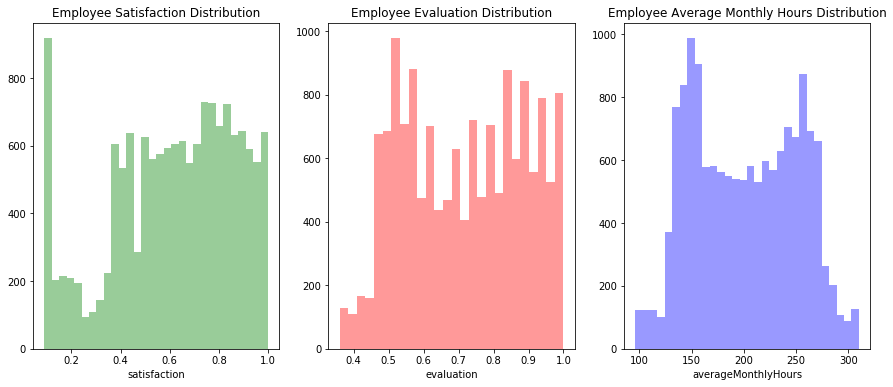

In [14]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(employee.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
sns.distplot(employee.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
sns.distplot(employee.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')

plt.show()

It seems that most employees clustered between 0.4 and 1.0 in terms of satisfaction. There seems to be a huge spike in having a satisfaction score of 0. For evaluation scores, there seems to be a spike in scores around 0.5 and 0.9, but the bulk of the data seems to be between 0.5-0.8. In a way, it almost looks bimodal. The same can be said for average monthly hours worked. There are spikes in 150 hours a month and 250 hours a month, but most of the data fall between these two points. Hmm..... Let's change gears and see employee turnover based on salary earned. 

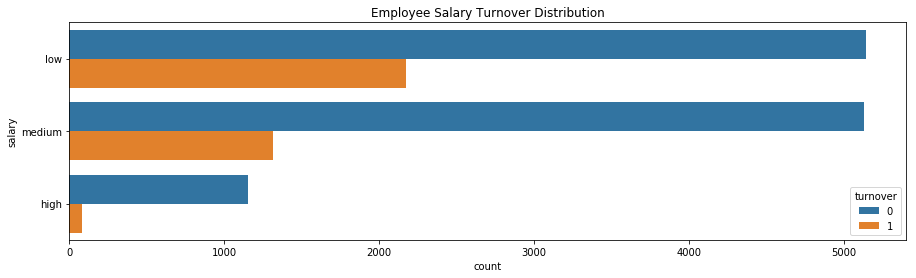

In [15]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=employee).set_title('Employee Salary Turnover Distribution');
plt.show()

It seems as if, out of the employees who left, most had a low to medium salary. Makes sense! Let's see if working for a specific department had anything to do with employees leaving.

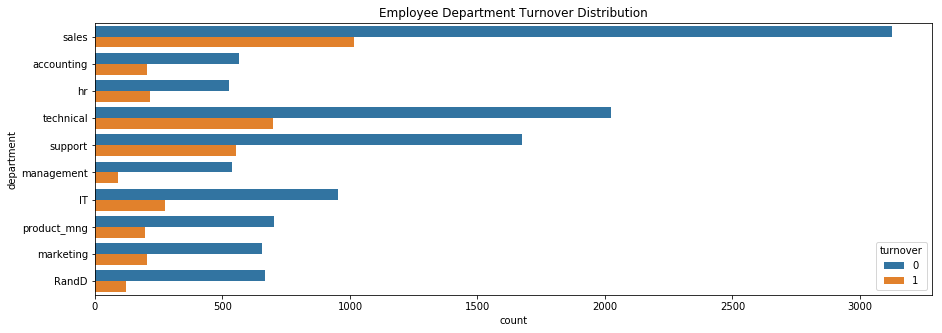

In [16]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=employee).set_title('Employee Department Turnover Distribution');
plt.show()

Hmmmmm, it seems that sales, technical, and support had the highest number of turnover rates, but it doesn't seem like it's anything too special. What if we looked at number of projects and turnover? Even though it wasn't strongly correlated, there could be something there.

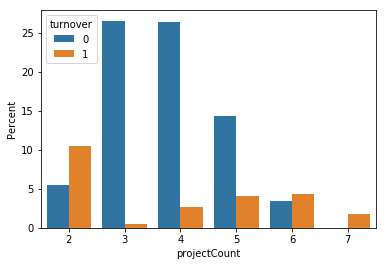

In [17]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=employee, estimator= lambda x: len(x) / len(employee) * 100)
ax.set(ylabel="Percent")
plt.show()

It seems like turnover rates are high if the person only had two projects, or they left if they had 4 or more projects. ANd if they had 7 projects, they definitely left. So there seems to be something going on with nnumber of hours worked a month, number of projects, salary, and the evalutation score form the higher ups. Hmm okay, let's do this: Let's plot turnover as a function of evaluation score.

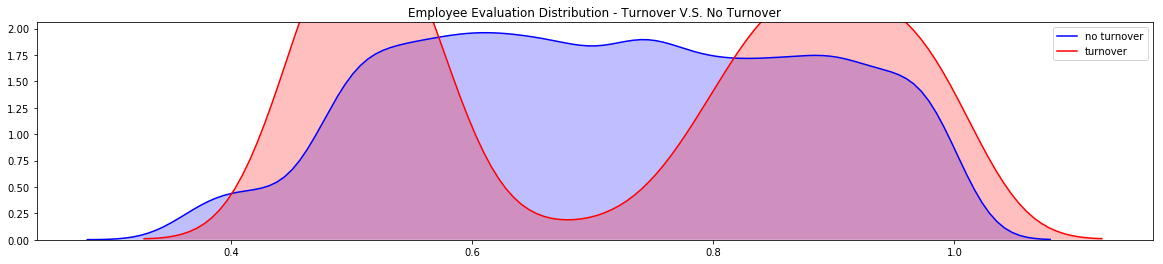

In [18]:
fig = plt.figure(figsize=(20,4),)
ax=sns.kdeplot(employee.loc[(employee['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(employee.loc[(employee['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')
plt.show()

Here is something real interesting. There seems to be a bimodal distribution (as we kinda saw before) in the employees who left. if they were rated below a 0.6 or above a 0.8, they tended to leave. Does that mean if you di a poor job or went above or beyond you left this company? 

What about average monthly hours and retention rates?

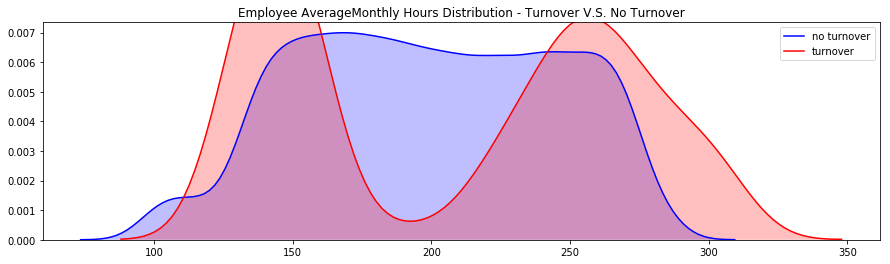

In [19]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(employee.loc[(employee['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(employee.loc[(employee['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')
plt.show()

Okay, now there is a picture forming. There seems to be another bimodal distribution forming. Here, if you work 150 hours a month or less, or more than 225 hours a month, you left the company. So the trend seems that if you underperform or overperform, whether indicated by performance reviews or hours worked per month, you left the company. 

Do any of these two metrics interact with the number of projects an employee works on? Surely, if you underperforming or overperforming, its also reflected in the number projects, no?

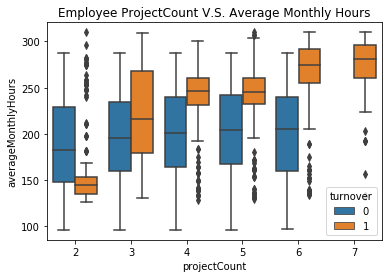

In [20]:
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=employee).set_title('Employee ProjectCount V.S. Average Monthly Hours')
plt.show()

Looks like if the employee worked around 150 hours per month, the employee was on 2 projects. The outliers are also interesting to note, as some employees who left worked over 250 hours on only 2 projects. The next interesting finding is those who worked on 6 or 7 projects and left tended to have worked over 250 hours a month. Again, overperformance or underperformance leads to a person leaving. 

Let's see project count and evaluation scores.

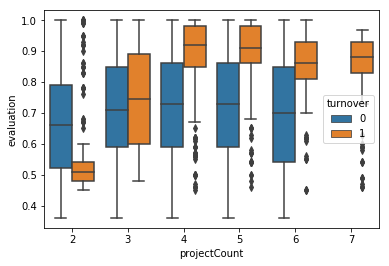

In [21]:
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=employee)
plt.show()

Pretty much like the previous plot. If the employee had two projects and left, most likely they were evaluated poorly (except for those who worked more hours, it seems the employer liked them!). If the employee was working on 4 projects or more, and were evaulated highly, they also left the company! Hmmm. Could it be that if you are a poor worker (low projects and hours put in), you were let go? And if you were a great worker (high performance and evaluations), you left to find a better job? 

Lets see if we plot the evaluation score with the satisfaction score. Do employees who love their job leave too?

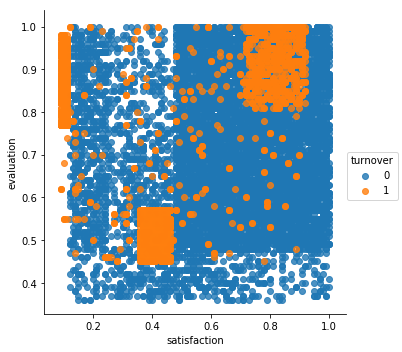

In [22]:
sns.lmplot(x='satisfaction', y='evaluation', data=employee,
           fit_reg=False,
           hue='turnover') 
plt.show()

Turns out they do! Employees who left can be split into three distinct categories: 1) Those who have a high evaluation score but low satisfaction (the "I hate my job and can find better" employee), 2) those who have low satisfaction and a low evaluation score (the "I hate my job and don't do well at it either" employee), and 3) those with high satisfaction and a high evaluation score (the "I love my job and I do it well, so I'm going to find a higher paying position in the same field probably" employee). One of the things that stands out is that these three types of employees form a cluster. 

Could we use a K Means Clustering algorithm to see if employee turnover, as a function of satisfaction and evaluation, form three distinct clusters? 

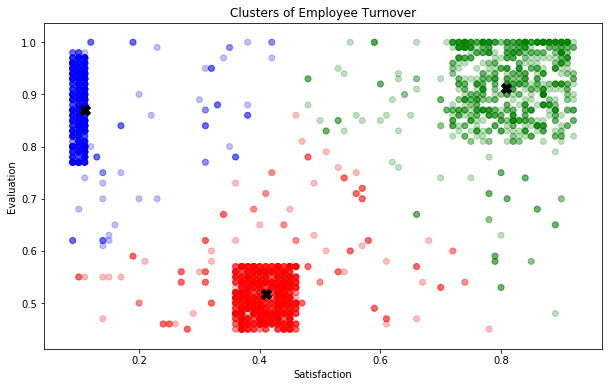

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(employee[employee.turnover==1][["satisfaction","evaluation"]])

kmeanscolors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=employee[employee.turnover==1],
            alpha=0.25,color = kmeanscolors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

It seems that clustering by Evaluation and Satisfaction does create three distinct clusters. 

What if we implemented a KNN's algorithm to predict whether an employee would leave based on the criteria above? 

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score 

# create design matrix X and target vector y
X = np.array(employee.values[:, 2:3]) 	# end index is exclusive
y = np.array(employee['turnover']) 	# another way of indexing a pandas df


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))


0.734


If we were to implement a KNNs algorithm, our accuracy for predicting whether an employee leaves based on evaluation and satisfaction is around 73%. If we cross validate our data, meaning we perform our prediction analysis a certain number of times over (in this case 10), we can remove any sampling biases we may incur by only predicting from one random training set.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
scores           
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.00)


Our accuracy bumps up to 76%, which still isn't great. What if we clustered employees who haven't left the company based on the same criteria? 

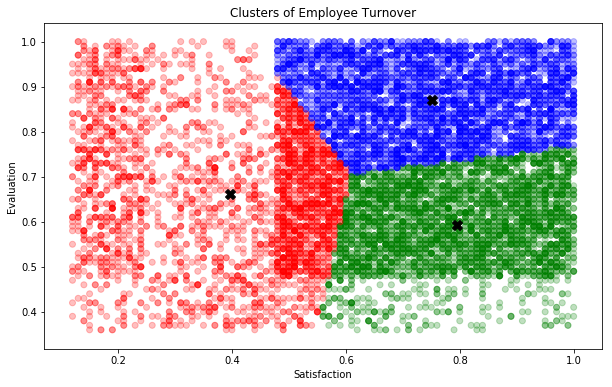

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(employee[employee.turnover==0][["satisfaction","evaluation"]])

kmeanscolors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=employee[employee.turnover==0],
            alpha=0.25,color = kmeanscolors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

It seems many employees cluster around high evaluation and high satisfaction, similar to one of our three groups of employees who leave. This means that I need to investigate other possible variables as a way to parse out those who left and those who stayed and who recieved high evaulation scores and reported high satisfaction. 

One possible variable is salary, as most of the employees who left reported low to medium salary. May a decision tree model to catergorize high and low salary would help in reclassifying turnover rates, thus making the data more predictable? 